C:\Users\KIIT\AppData\Local\Temp\ipykernel_24272\274341733.py:12: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(h - y))
C:\Users\KIIT\AppData\Local\Temp\ipykernel_24272\274341733.py:15: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


Learned parameters: theta_0 = nan, theta_1 = nan
Cost function value after convergence: nan


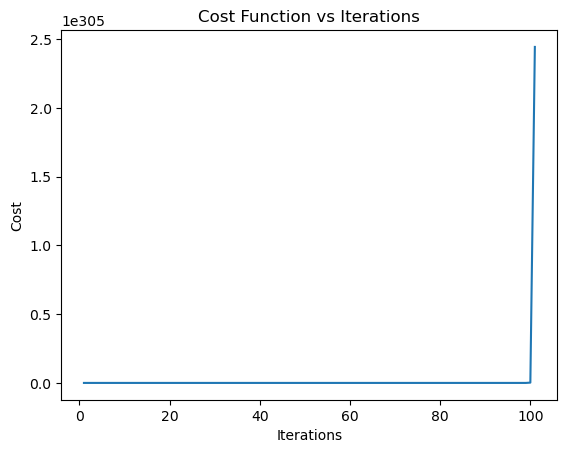

In [4]:
min_length = min(len(x), len(y))
x = x[:min_length]
y = y[:min_length]
X = np.c_[np.ones(len(x)), x]
theta = np.zeros(2)  
alpha = 0.5  
iterations = 1000  
m = len(y)
cost_history = []
for i in range(iterations):
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(h - y))
    cost_history.append(cost)
    gradient = (1 / m) * X.T.dot(h - y)
    theta -= alpha * gradient
print(f"Learned parameters: theta_0 = {theta[0]}, theta_1 = {theta[1]}")
print(f"Cost function value after convergence: {cost_history[-1]}")
plt.plot(range(1, iterations+1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.show()


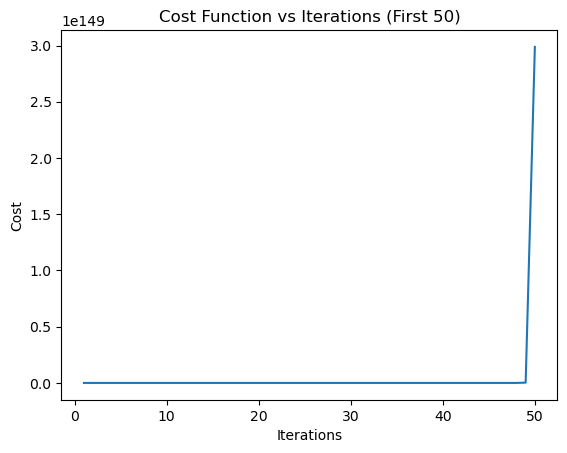

In [5]:
plt.plot(range(1, 51), cost_history[:50])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations (First 50)')
plt.show()


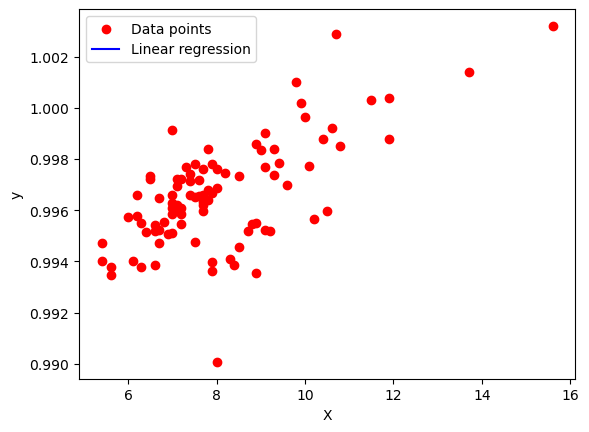

In [6]:
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x, X.dot(theta), label='Linear regression', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


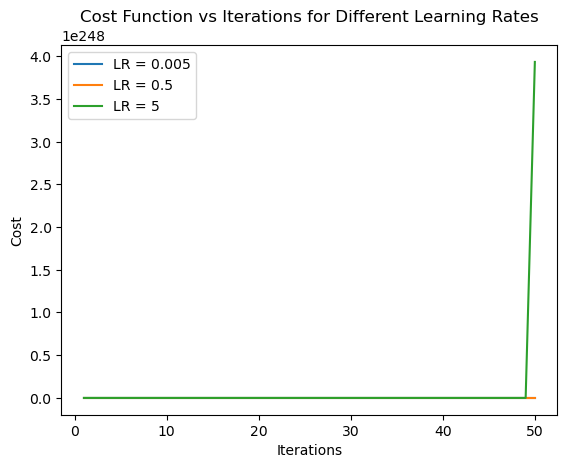

In [7]:
def gradient_descent_with_lr(alpha, iterations=50):
    theta = np.zeros(2)
    cost_history = []
    for i in range(iterations):
        h = X.dot(theta)
        cost = (1 / (2 * m)) * np.sum(np.square(h - y))
        cost_history.append(cost)
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
    return cost_history
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    cost_history = gradient_descent_with_lr(lr)
    plt.plot(range(1, 51), cost_history[:50], label=f'LR = {lr}')
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()


In [8]:
def stochastic_gradient_descent(alpha, iterations=50):
    theta = np.zeros(2)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            x_j = X[j, :].reshape(1, -1)
            y_j = y[j]
            h = np.dot(x_j, theta)
            cost = (1 / (2 * m)) * np.sum(np.square(h - y_j))
            cost_history.append(cost)
            gradient = x_j.T.dot(h - y_j)
            theta -= alpha * gradient
    return cost_history
